# La funcion costo a minimizar es:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left ( h_{\theta}(x^{(i)}) - y^{(i)} \right )^2 $

$ h_{\theta}=\theta^{T}x $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importa los datos de un url ; no se requieren localmente!
import io
import requests
url="http://nbviewer.ipython.org/github/jdwittenauer/ipython-notebooks/\
blob/master/data/ex1data1.txt"
s = requests.get(url).content

In [3]:
datos = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
datos.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Quizas conviene ponerle nombres a las columnas de los datos:

In [4]:
datos.columns=['Poblacion','Ganancia']

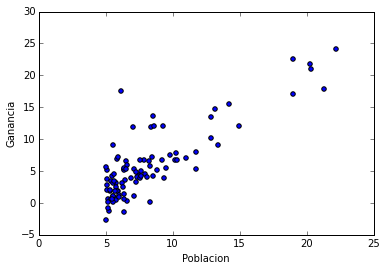

In [5]:
datos.plot(kind='scatter',x='Poblacion',y='Ganancia')

Tambien puede hacerse todo, importar, nombrar columnas, etc, en un solo comando; tambien mostramos la descripcion estadistica de cada columna:

In [6]:
datos = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None, names=['Poblacion','Ganancia'])
datos.describe()

,Poblacion,Ganancia
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


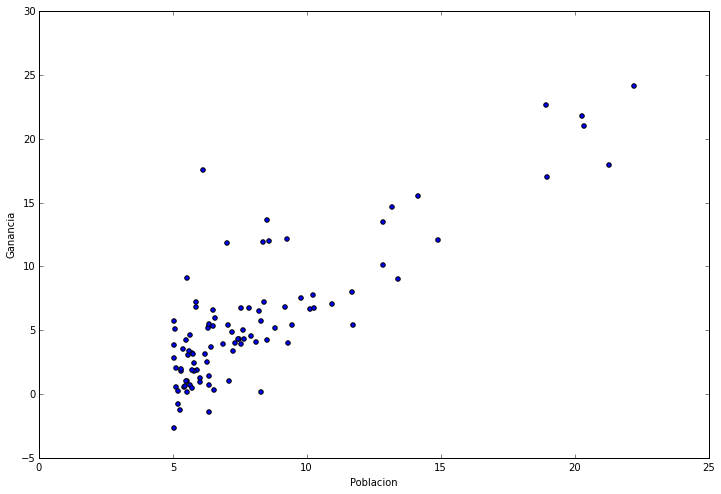

In [7]:
datos.plot('Poblacion','Ganancia',kind='scatter', figsize=(12,8))

Ahora vamos a implementar la regresion lineal como se presento en clase. Primero creamos la function de costo:

Insertamos una columna de 1's en los datos:

In [8]:
datos.insert(0, 'Unos', 1) # 0=indice de columna; 'Unos'=nombre de columna; 1=valor a agregar
datos.head()

,Unos,Poblacion,Ganancia
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Inicializamos los valores de los parametros de $\theta$:

In [9]:
# X datos de entrenamiento; y objetivos
renglones,columnas = datos.shape # multiasociacion de variables

X = datos.iloc[:,0:columnas-1] # accediendo valores de datos

# completen la instruccion para asignar a la variable y 
# los valores de la ultima columna de datos (Ganancia)
y = datos.iloc[:,columnas-1:columnas]

In [46]:
# as instrucciones siguientes son equivalentes:
np.array(X)
X.values

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [10]:
theta = np.array([[0.,0.]])

In [11]:
(X.values).shape, y.values.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
# regresa el vector columna obtenido de multiplicar los atributos con los parametrs
np.dot(X.values,theta.T)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [13]:
dot2 = np.power(np.dot(X.values,theta.T) - y.values,2)
np.sum(dot2)/(2*len(X.values))

32.072733877455676

In [14]:
np.power?
np.dot?

Ahora encapsulamos las intrucciones en una funcion:

In [15]:
def calculaCosto(X, y, theta):
    dot2 = np.power(np.dot(X.values,theta.T) - y.values,2)
    return np.sum(dot2)/(2*len(X.values))

In [16]:
calculaCosto(X,y,theta)

32.072733877455676

Implementaremos el _Gradient descent_; las siguientes lineas de codigo hacen los calculos, ejecuten y vean que ocurre

In [17]:
theta = np.array([[0.,0.]])
error = np.dot(X.values,theta.T)-y.values
term = error*X.values
alpha = 0.001
print 'Valores nuevos de theta_0, theta_1: ', theta - alpha*np.sum(term,axis=0)/len(X.values) 

Valores nuevos de theta_0, theta_1:  [[ 0.00583914  0.06532885]]


## Ejercicio
* Encapsular las instrucciones en una funcion. Se les proporciona el inicio del codigo. La funcion debe retornar el conjunto de valores de $\theta$ y el valor de la funcinon costo $J(\theta)$.
* Iterar el algoritmo 1000 veces usando un valor de $\alpha=0.01$ usando como valor inicial $\theta=[0.,0.]$.

In [18]:
def gradientDescent(X, y, theta, alpha):
    error = np.dot(X.values,theta.T)-y.values
    term = error*X.values
    temp = theta - alpha*np.sum(term,axis=0)/len(X.values)
    return temp, calculaCosto(X,y,temp)

In [19]:
gradientDescent(X, y, np.array([[0.,0.]]), 0.01)

(array([[ 0.05839135,  0.6532885 ]]), 6.7371904648700074)

In [22]:
# repite gradientDescent k veces con condicion inicial theta=0
k = 1000
theta = np.array([[0.,0.]])
for i in range(k):
    temp = theta
    theta, costo = gradientDescent(X, y, temp, 0.01)
print theta, costo

[[-3.24140214  1.1272942 ]] 4.51595550308


## Grafica de los datos incluyendo regresion lineal 

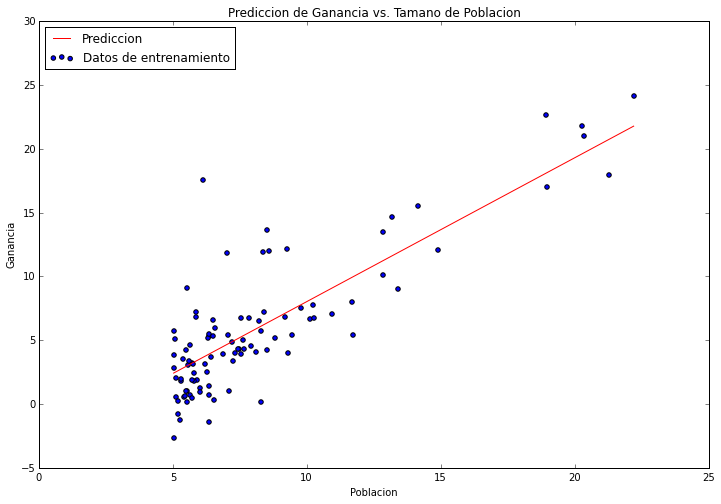

In [23]:
x = np.linspace(datos.Poblacion.min(), datos.Poblacion.max(), 100)
l = theta[0,0] + theta[0,1]*x

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, l, 'r', label='Prediccion')
ax.scatter(datos.Poblacion, datos.Ganancia, label='Datos de entrenamiento')
ax.legend(loc=2)
ax.set_xlabel('Poblacion')
ax.set_ylabel('Ganancia')
ax.set_title('Prediccion de Ganancia vs. Tamano de Poblacion')

## Ejercicio
* Grafiquen el costo en cada iteracion para reproducir la curva que muestra que el valor del costo disminuye
* Implementen el algoritmo en los datos de clase, considerando unicamente los atributos Edad y Peso.

In [29]:
J = []
k = 1000
theta = np.array([[0.,0.]])
for i in range(k):
    temp = theta
    theta, costo = gradientDescent(X, y, temp, 0.01)
    J.append(costo)

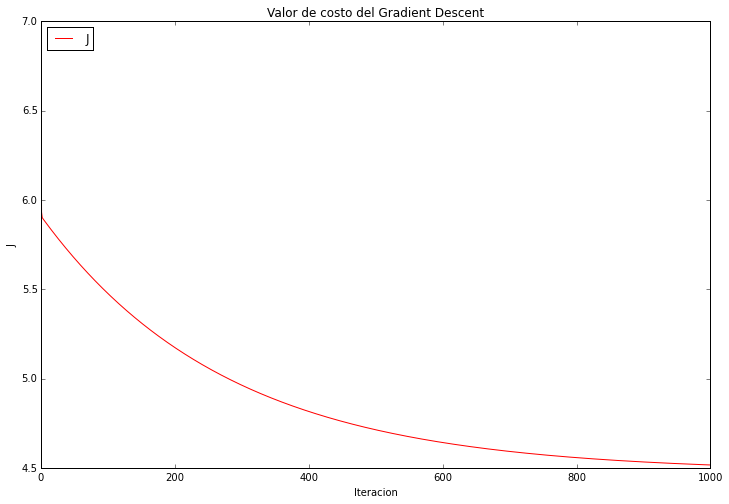

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(J, 'r', label='J')
ax.legend(loc=2)
ax.set_xlabel('Iteracion')
ax.set_ylabel('J')
ax.set_title('Valor de costo del Gradient Descent')